In [1]:
import pandas as pd

df = pd.read_csv("Movies.csv")

print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nFirst 5 rows:\n", df.head())
print("\nSummary:\n")
print(df.info())


Shape: (3853, 28)

Columns:
 Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

First 5 rows:
    color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4  Color     Andrew Stanton                   462

In [4]:

df.drop(columns=[
    'color', 'movie_imdb_link', 'plot_keywords',
    'actor_1_facebook_likes', 'actor_2_facebook_likes',
    'actor_3_facebook_likes', 'director_facebook_likes',
    'movie_facebook_likes'
], inplace=True, errors='ignore')


df.dropna(subset=['genres', 'imdb_score', 'title_year'], inplace=True)

df['content_rating'] = df['content_rating'].fillna('Unrated')
df['aspect_ratio'] = df['aspect_ratio'].fillna(df['aspect_ratio'].median())
df['facenumber_in_poster'] = df['facenumber_in_poster'].fillna(0)
df['duration'] = df['duration'].fillna(df['duration'].median())

# Convert types
df['title_year'] = df['title_year'].astype(int)
df['duration'] = df['duration'].astype(int)
df['imdb_score'] = df['imdb_score'].round(1)

# Strip whitespaces from movie titles
df['movie_title'] = df['movie_title'].str.strip()


In [5]:
df.columns


Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'imdb_score', 'aspect_ratio'],
      dtype='object')

In [7]:
movies_per_year = df['title_year'].value_counts().sort_index()
movies_per_year

title_year
1920      1
1927      1
1929      1
1933      1
1935      1
       ... 
2012    163
2013    170
2014    156
2015    135
2016     67
Name: count, Length: 75, dtype: int64

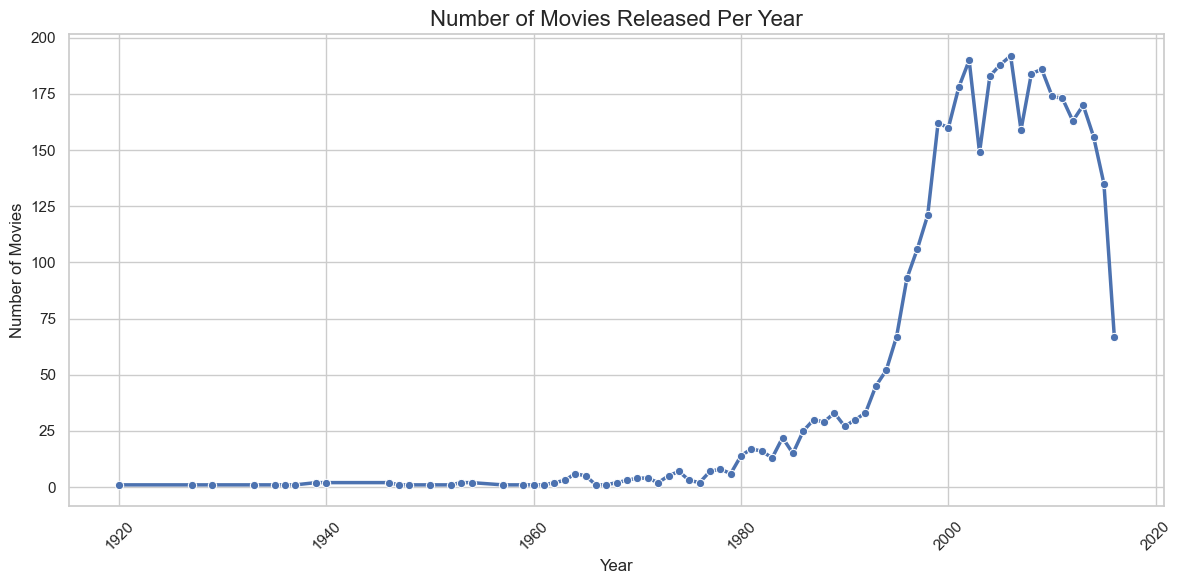

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

movies_per_year = df['title_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker="o", linewidth=2.5)
plt.title('Number of Movies Released Per Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\DEBANJAN\AppData\Local\Temp\ipykernel_1192\1761258415.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres_df, x='Count', y='Genre', palette='mako')


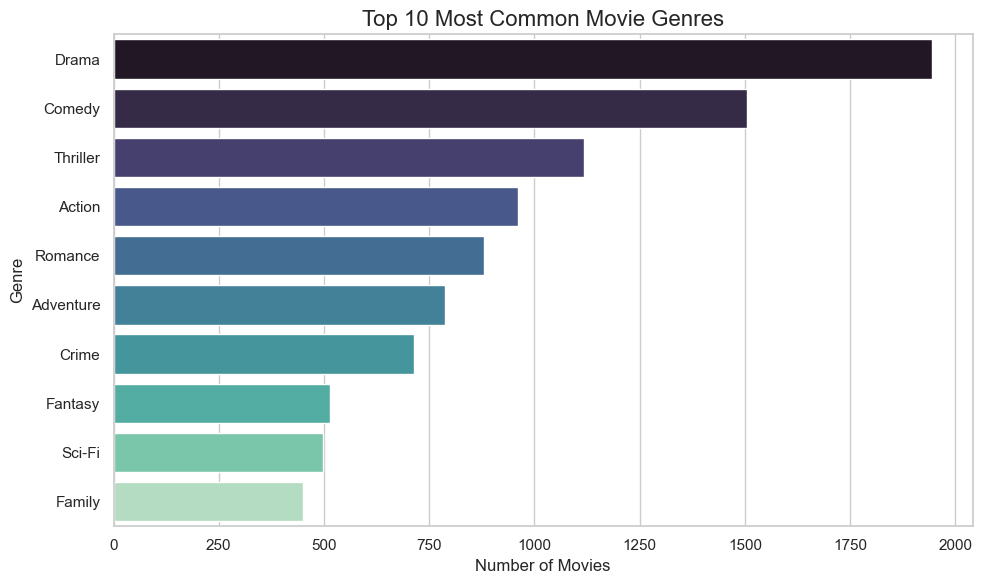

In [10]:
from collections import Counter

genre_list = df['genres'].dropna().apply(lambda x: x.split('|')).tolist()
flat_genres = [genre for sublist in genre_list for genre in sublist]

genre_counts = Counter(flat_genres)
top_genres = genre_counts.most_common(10)

top_genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_genres_df, x='Count', y='Genre', palette='mako')
plt.title('Top 10 Most Common Movie Genres', fontsize=16)
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


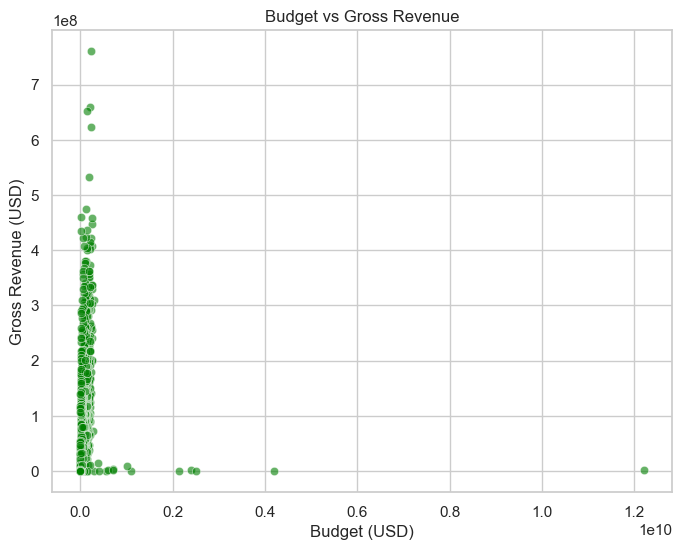

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='gross', data=df, alpha=0.6, color='green')
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Gross Revenue (USD)')
plt.grid(True)
plt.show()


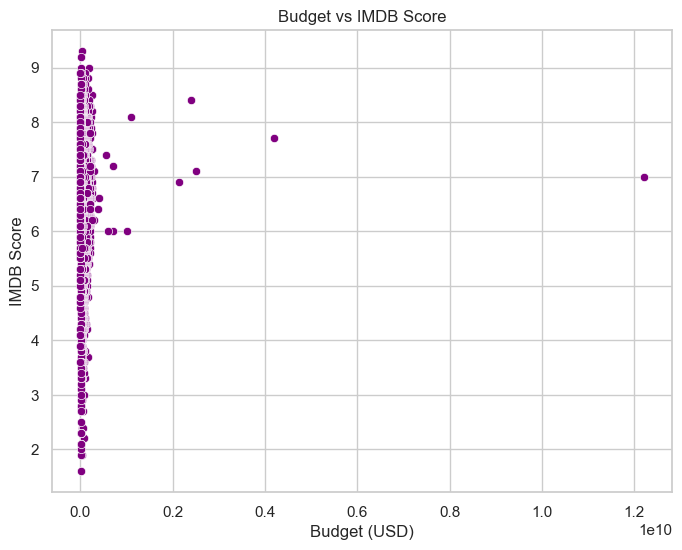

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='imdb_score', data=df, color='purple')
plt.title('Budget vs IMDB Score')
plt.xlabel('Budget (USD)')
plt.ylabel('IMDB Score')
plt.grid(True)
plt.show()


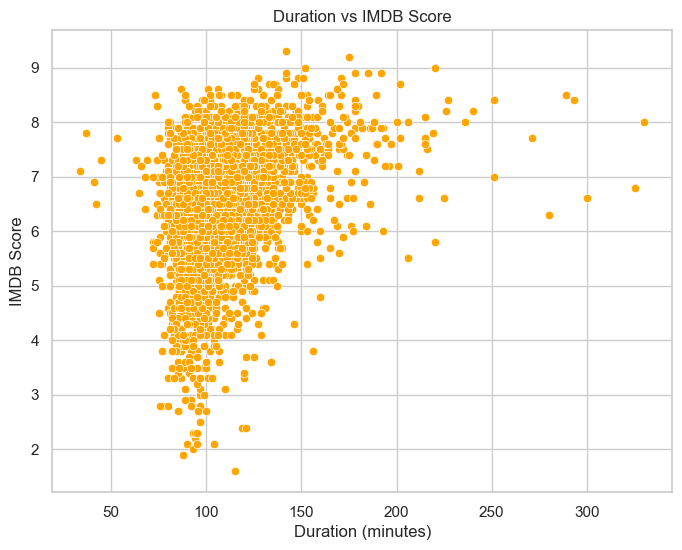

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='duration', y='imdb_score', data=df, color='orange')
plt.title('Duration vs IMDB Score')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDB Score')
plt.grid(True)
plt.show()


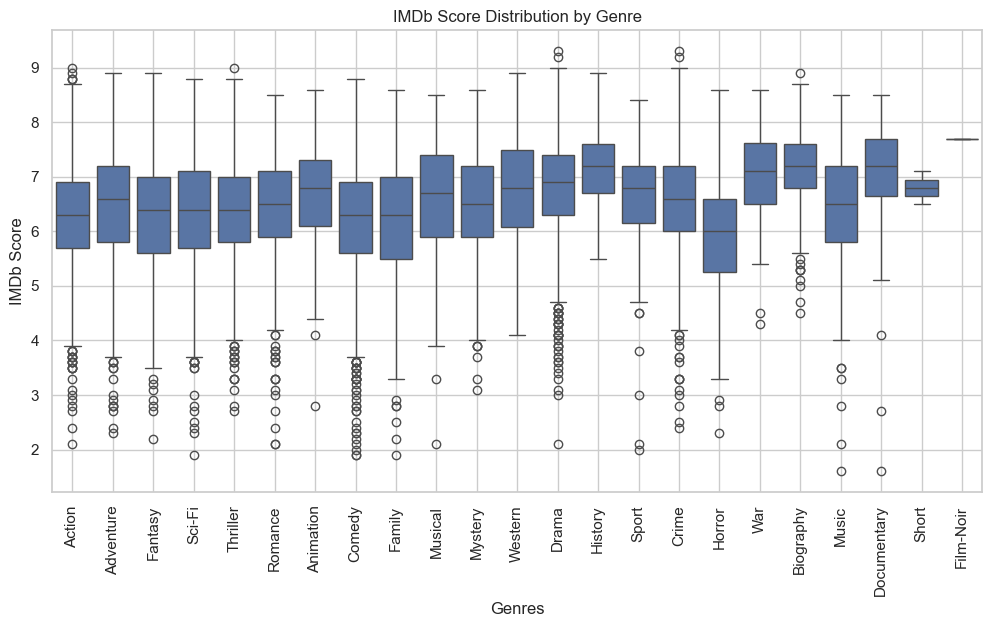

In [15]:

df_genres = df.copy()

df_genres['genres'] = df_genres['genres'].str.split('|')
df_genres = df_genres.explode('genres')

plt.figure(figsize=(12,6))
sns.boxplot(x='genres', y='imdb_score', data=df_genres)
plt.xticks(rotation=90)
plt.title('IMDb Score Distribution by Genre')
plt.xlabel('Genres')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.show()


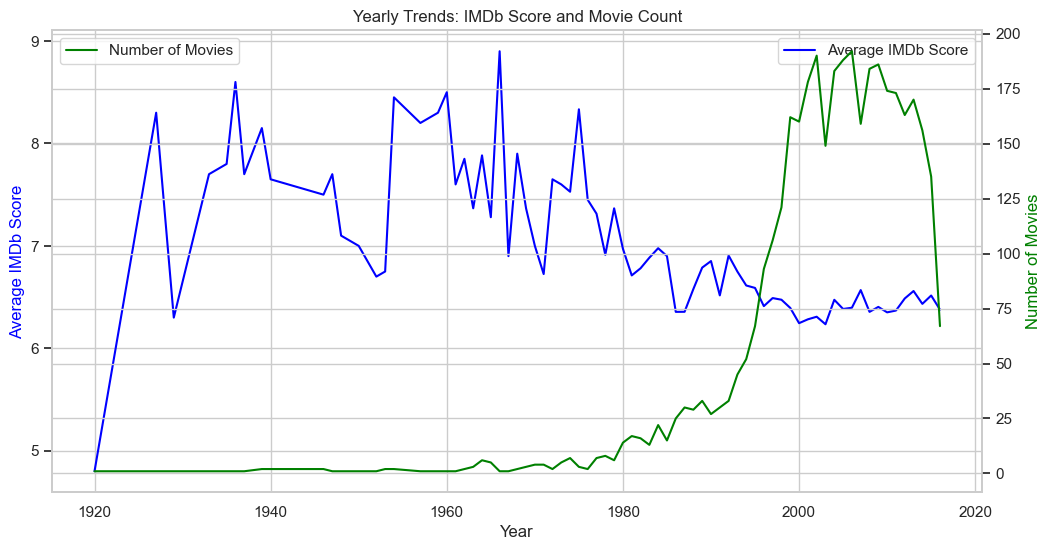

In [22]:


yearly_data = df.groupby('title_year').agg({
    'imdb_score': 'mean',
    'title_year': 'count'
}).rename(columns={'title_year': 'movie_count'})

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=yearly_data, x=yearly_data.index, y='imdb_score', ax=ax1, color='blue', label='Average IMDb Score')
ax1.set_ylabel('Average IMDb Score', color='blue')
ax1.set_xlabel('Year')
ax1.set_title('Yearly Trends: IMDb Score and Movie Count')

ax2 = ax1.twinx()
sns.lineplot(data=yearly_data, x=yearly_data.index, y='movie_count', ax=ax2, color='green', label='Number of Movies')
ax2.set_ylabel('Number of Movies', color='green')

plt.show()


In [17]:
top_revenue = df[['movie_title', 'gross']].sort_values(by='gross', ascending=False).head(10)
print(top_revenue)

top_scores = df[['movie_title', 'imdb_score']].sort_values(by='imdb_score', ascending=False).head(10)
print(top_scores)

df['roi'] = (df['gross'] - df['budget']) / df['budget']
top_roi = df[['movie_title', 'roi']].sort_values(by='roi', ascending=False).head(10)
print(top_roi)


                                    movie_title        gross
0                                        Avatar  760505847.0
25                                      Titanic  658672302.0
28                               Jurassic World  652177271.0
16                                 The Avengers  623279547.0
64                              The Dark Knight  533316061.0
230   Star Wars: Episode I - The Phantom Menace  474544677.0
2704         Star Wars: Episode IV - A New Hope  460935665.0
7                       Avengers: Age of Ultron  458991599.0
3                         The Dark Knight Rises  448130642.0
552                                     Shrek 2  436471036.0
                                        movie_title  imdb_score
1795                       The Shawshank Redemption         9.3
3016                                  The Godfather         9.2
2543                         The Godfather: Part II         9.0
64                                  The Dark Knight         9.0
325   The

In [19]:
top_actors = df['actor_1_name'].value_counts().head(10)
print(top_actors)
avg_score_by_actor = df.groupby('actor_1_name')['imdb_score'].mean().sort_values(ascending=False).head(10)
print(avg_score_by_actor)


actor_1_name
Robert De Niro       42
Johnny Depp          38
J.K. Simmons         31
Denzel Washington    30
Nicolas Cage         30
Matt Damon           29
Bruce Willis         29
Liam Neeson          27
Robin Williams       26
Robert Downey Jr.    26
Name: count, dtype: int64
actor_1_name
Takashi Shimura           8.7
Scatman Crothers          8.7
Bunta Sugawara            8.6
Paulette Goddard          8.6
Collin Alfredo St. Dic    8.5
Emilia Fox                8.5
Bahare Seddiqi            8.5
Janet Leigh               8.5
Jürgen Prochnow           8.4
Claude Rains              8.4
Name: imdb_score, dtype: float64


C:\Users\DEBANJAN\AppData\Local\Temp\ipykernel_1192\1555597232.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_directors, y='director_name', x='imdb_score', palette='mako')


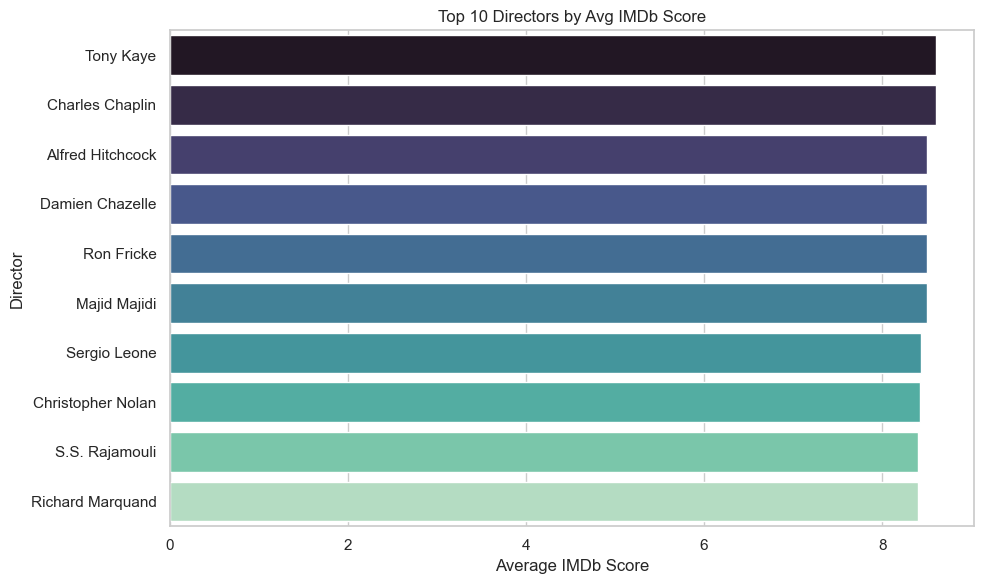

In [23]:
top10_directors = df.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_directors, y='director_name', x='imdb_score', palette='mako')
plt.title('Top 10 Directors by Avg IMDb Score')
plt.xlabel('Average IMDb Score')
plt.ylabel('Director')
plt.tight_layout()
plt.show()
